In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)
transform_df = pd.read_csv(filename)
#Make a plot of your choice here showing something interesting about the titanic data.
#Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
#Once you've got something you're happy with, share it on the forums!

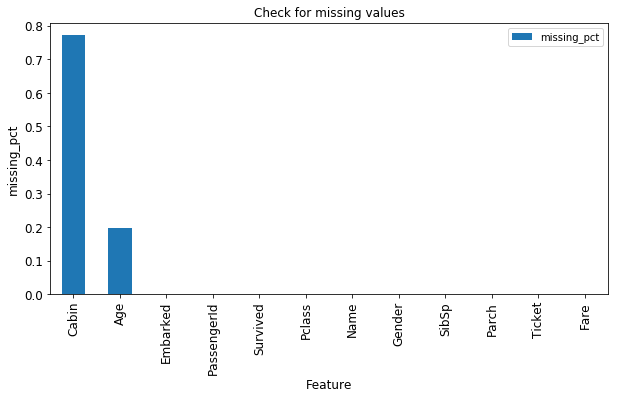

In [143]:
## Check for missing values
missing_values_df = pd.DataFrame(titanic_df.isnull().sum()/titanic_df.shape[0])
missing_values_df.index.name = 'Feature'
missing_values_df.columns = ['missing_pct']
missing_values_df.sort_values(['missing_pct'], ascending=[False], inplace=True)

ax = missing_values_df[['missing_pct']].plot(kind='bar', title ="Check for missing values", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Feature", fontsize=12)
ax.set_ylabel("missing_pct", fontsize=12)
plt.show()


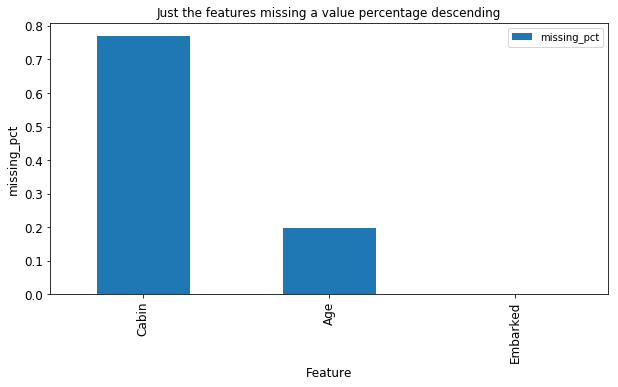

In [144]:
yoda_df = missing_values_df[missing_values_df['missing_pct'] > 0]

ax = yoda_df[['missing_pct']].plot(kind='bar', title ="Just the features missing a value percentage descending", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Feature", fontsize=12)
ax.set_ylabel("missing_pct", fontsize=12)
plt.show()


In [145]:
transform_df['Age'].fillna(0, inplace=True)

if False:
    print(titanic_df['Age'].head(10))
    print(transform_df['Age'].head(10))


In [146]:
transform_df['Embarked'].fillna('(Blanks)', inplace=True)

if False:
    print(transform_df['Embarked'].head(10))


In [147]:
def get_title(name):
    comma = name.find(',')
    period = name.find('.')
    title = name[comma+2:period+1]
    return title

if False:
    print(get_title('Baumann, Mr. John D'))
    print(get_title('Boulos, Mr. Hanna'))
    print(get_title('Boulos, Mrs. Joseph (Sultana)'))
    print(get_title('Bourke, Miss. Mary'))
    print(get_title('Bradley, Mr. George ("George Arthur Brayton")'))
    print(get_title('Brewe, Dr. Arthur Jackson'))



In [148]:
transform_df['Title'] = transform_df.apply(lambda row: get_title(row.Name), axis=1)

if False:
    print(transform_df['Title'].head(10))    


In [149]:
title_group = transform_df.groupby('Title').size().reset_index(name='count')
title_list = title_group['Title']
for x in title_list:
    title_df = transform_df[transform_df['Title'] == x]
    agenonzero_df = title_df[title_df['Age'] != 0]
    title_age_median = np.mean(agenonzero_df['Age'])
    agezero_df = title_df[title_df['Age'] == 0]
    transform_df.loc[(transform_df['Title'] == x) & (transform_df['Age'] == 0), 'Age'] = title_age_median
    
if False:    
    print(transform_df['Age'].head(20))
    print(transform_df['Title'].head(20))


In [150]:
def get_agegroup(age):
    if age < 20:
        return '1: 0-19'
    if age < 40:
        return '2: 20-39'
    if age < 60:
        return '3: 40-59'
    if age < 80:
        return '4: 60-79'
    else:
        return '5: 80+'

if False:
    print(get_agegroup(0)) 
    print(get_agegroup(55)) 
    print (get_agegroup(100))
    


In [151]:
transform_df['AgeGroup'] = transform_df.apply(lambda row: get_agegroup(row.Age), axis=1)

if False:
    print(transform_df['AgeGroup'].head(10))    


In [152]:
def get_faregroup(fare, mean):
    intmean = int(mean)
    inthalfmean = int(mean/2)
    intdoublemean = int(mean*2)
    if fare < mean:
        if fare < (mean/2):
            return '1: 0-'+str(inthalfmean-1)
        else:
            return '2: '+str(inthalfmean)+'-'+str(intmean-1)
    if fare > mean:
        if fare < (mean*2):
            return '3: '+str(intmean)+'-'+str(intdoublemean-1)
        else:
            return '4: '+str(intdoublemean)+'+'

if False:
    print(get_faregroup(15,32.204207968574636)) 
    print(get_faregroup(31,32.204207968574636)) 
    print(get_faregroup(32,32.204207968574636)) 
    print(get_faregroup(33,32.204207968574636)) 
    print(get_faregroup(65,32.204207968574636)) 
    print (get_faregroup(32.204207968574636,32.204207968574636))


In [153]:
faremean = transform_df['Fare'].mean()
transform_df['FareGroup'] = transform_df.apply(lambda row: get_faregroup(row.Fare, faremean), axis=1)

if False:
    print(transform_df['FareGroup'].head(10))


In [154]:
transform_df['DeckLevel'] = transform_df['Cabin'].str.slice(0,1)
transform_df['DeckLevel'].fillna('(Blanks)', inplace=True)


In [155]:
transform_df['TicketIndex'] = transform_df['Ticket'].str.slice(0,1)


In [261]:
dead = transform_df[transform_df['Survived'] == 0]
alive = transform_df[transform_df['Survived'] == 1]
female_alive = alive[alive['Gender'] == 'female']
female_dead = dead[dead['Gender'] == 'female']
male_alive = alive[alive['Gender'] == 'male']
male_dead = dead[dead['Gender'] == 'male']



In [157]:
def plot_survival_count(alive, dead, plot_title, xlabel, ylabel):
    alive_group = alive.groupby([xlabel]).size().reset_index(name='Alive')
    dead_group = dead.groupby([xlabel]).size().reset_index(name='Dead')
    
    merge_dead_and_alive = pd.merge(alive_group, dead_group, how='outer', on=xlabel)
    merge_dead_and_alive['Alive'].fillna(0, inplace=True)
    merge_dead_and_alive['Dead'].fillna(0, inplace=True)

    plot_df = merge_dead_and_alive
    plot_df.set_index(xlabel, inplace=True)
    plot_df.sort_values(['Alive'], ascending=[False], inplace=True)
    
    my_plot = plot_df.plot(kind='bar',stacked=True,title=plot_title)
    my_plot.set_xlabel(xlabel)
    my_plot.set_ylabel(ylabel)
    plt.show()

In [158]:
def plot_survival_rates(alive, dead, plot_title, xlabel, ylabel):
    alive_group = alive.groupby([xlabel]).size().reset_index(name='AliveCount')
    dead_group = dead.groupby([xlabel]).size().reset_index(name='DeadCount')
    merge_dead_and_alive = pd.merge(alive_group, dead_group, how='outer', on=xlabel)

    merge_dead_and_alive['AliveCount'].fillna(0, inplace=True)
    merge_dead_and_alive['DeadCount'].fillna(0, inplace=True)

    merge_dead_and_alive['Alive'] = (merge_dead_and_alive['AliveCount']/(merge_dead_and_alive['DeadCount']+merge_dead_and_alive['AliveCount']))*100
    merge_dead_and_alive['Dead'] = (merge_dead_and_alive['DeadCount']/(merge_dead_and_alive['DeadCount']+merge_dead_and_alive['AliveCount']))*100

    del merge_dead_and_alive['AliveCount']
    del merge_dead_and_alive['DeadCount']

    plot_df = merge_dead_and_alive
    plot_df.set_index(xlabel, inplace=True)
    plot_df.sort_values(['Alive'], ascending=[False], inplace=True)
    
    my_plot = plot_df.plot(kind='bar',stacked=True,title=plot_title)
    my_plot.set_xlabel(xlabel)
    my_plot.set_ylabel(ylabel)
    plt.show()


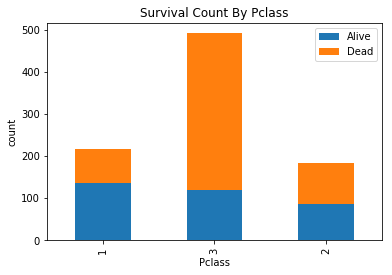

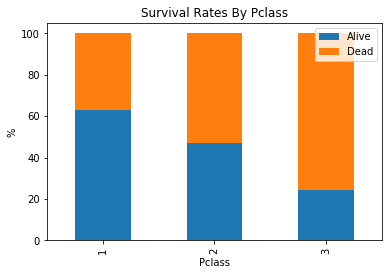

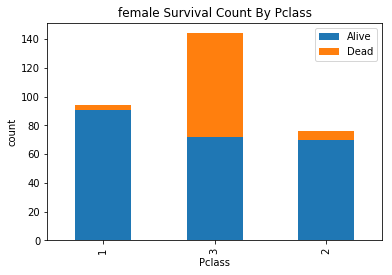

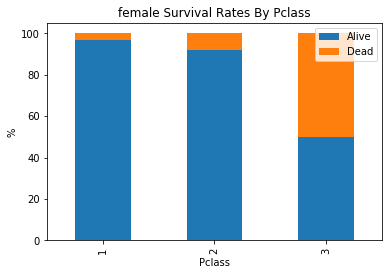

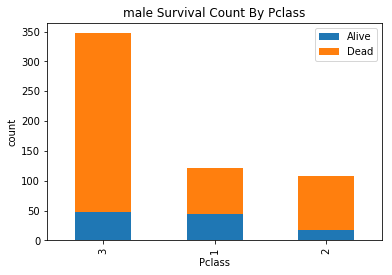

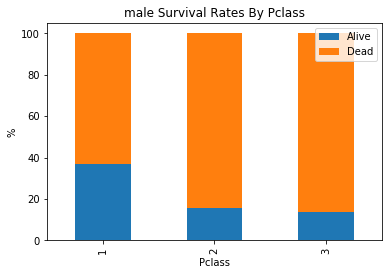

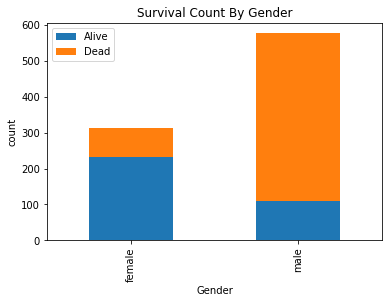

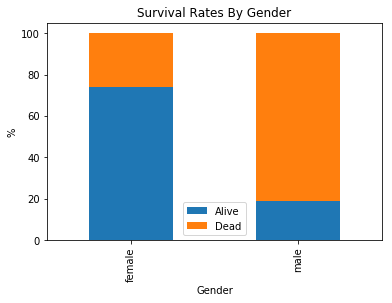

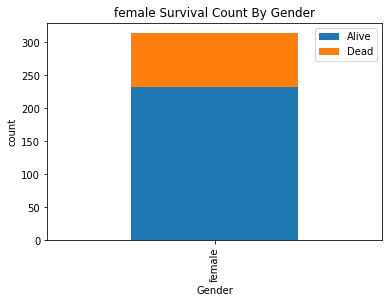

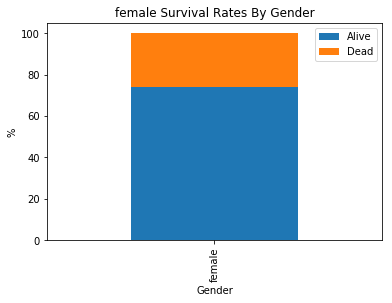

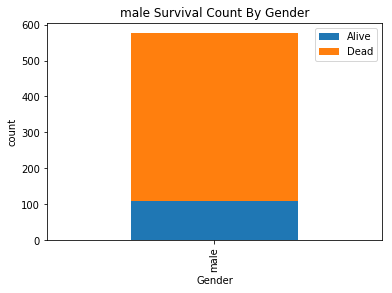

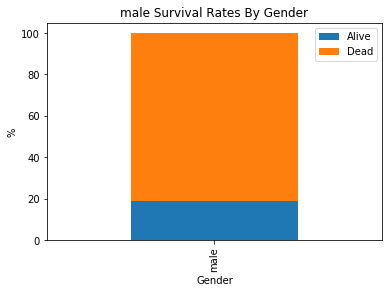

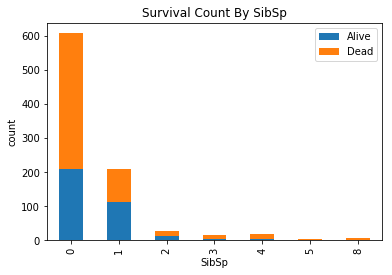

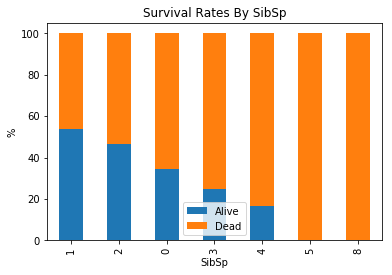

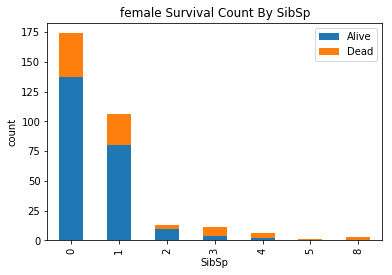

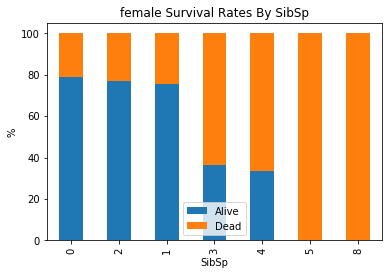

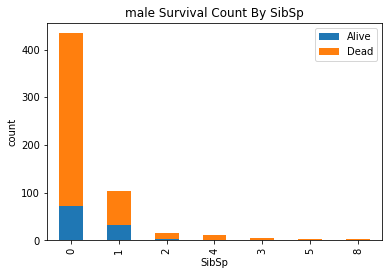

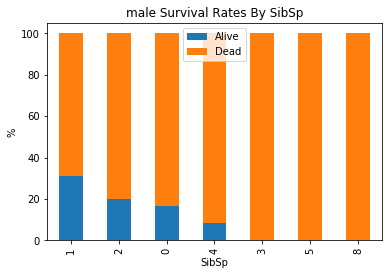

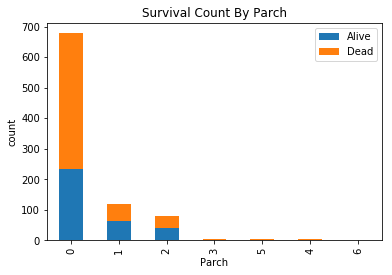

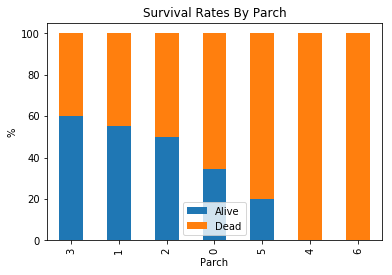

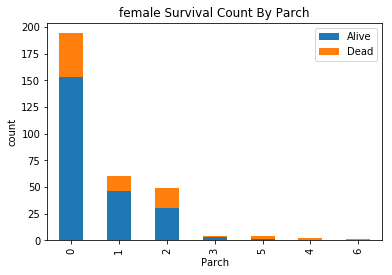

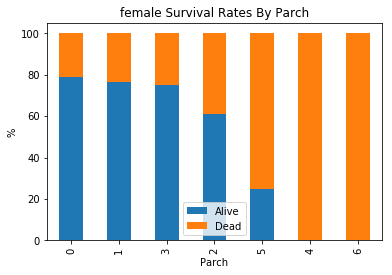

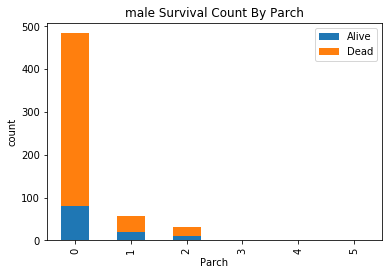

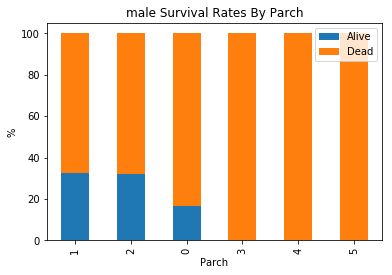

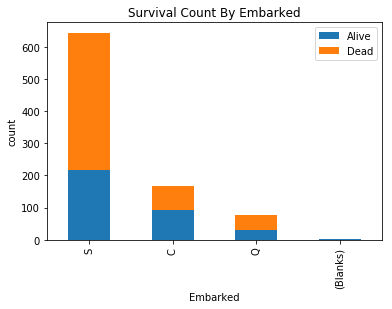

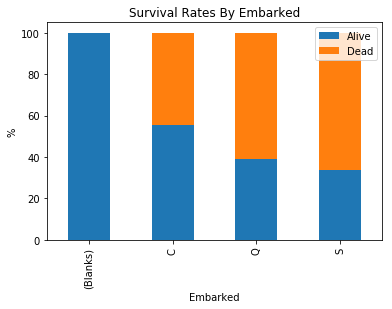

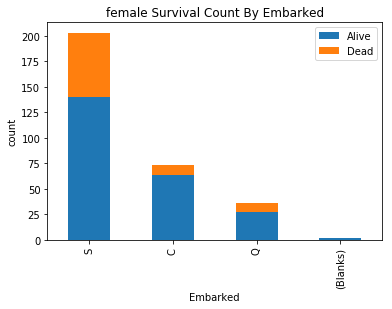

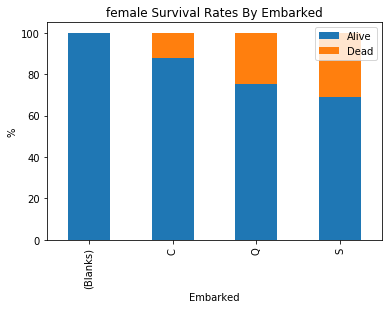

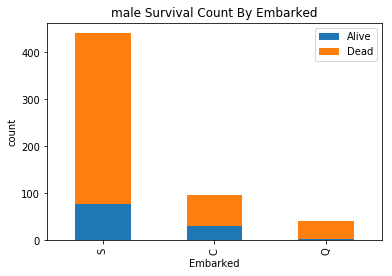

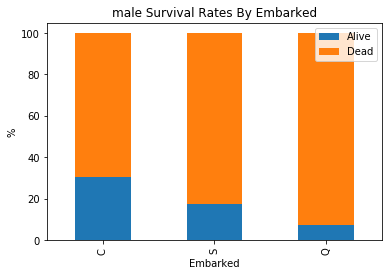

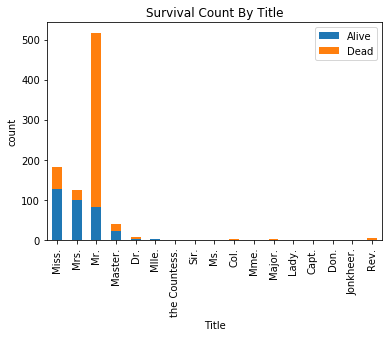

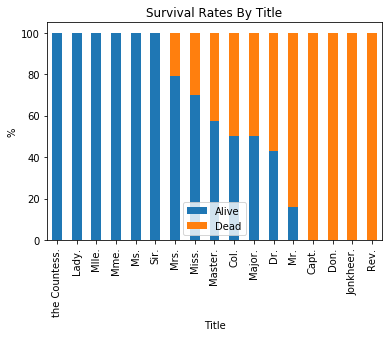

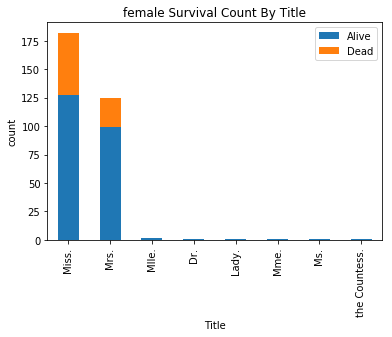

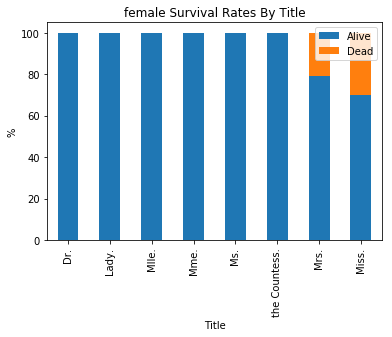

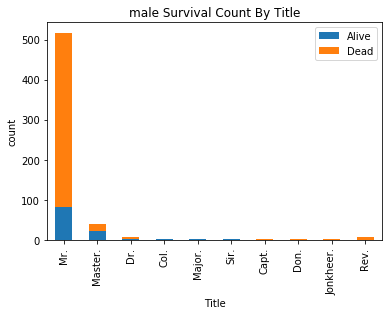

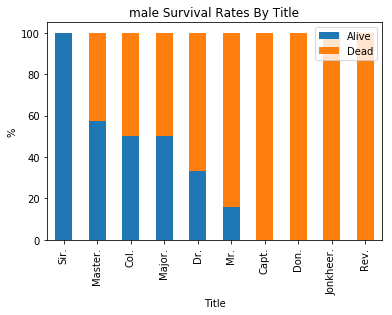

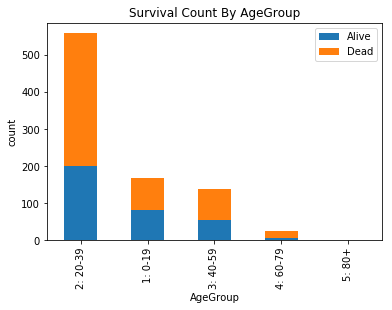

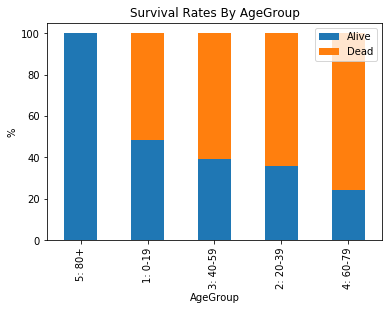

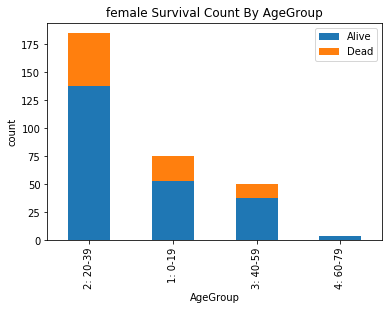

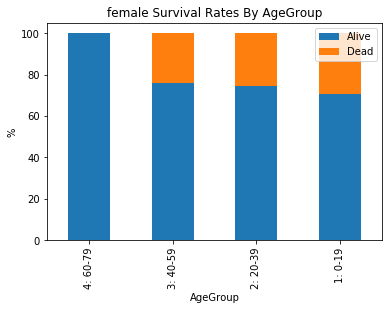

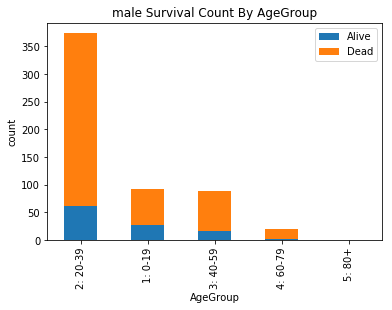

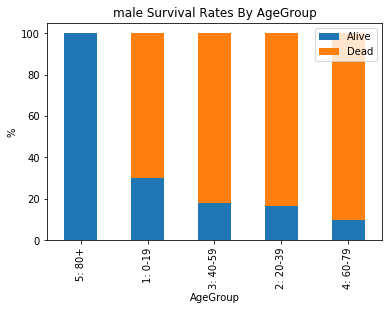

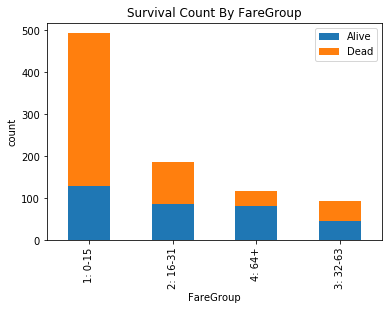

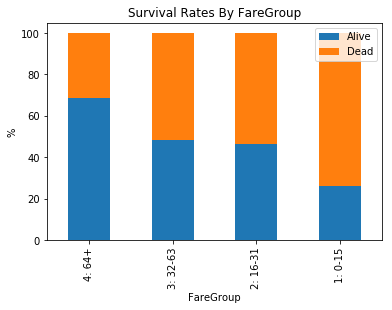

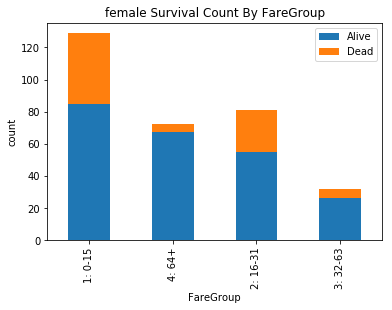

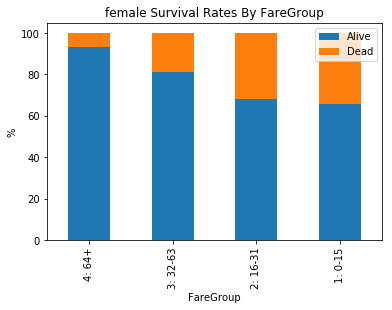

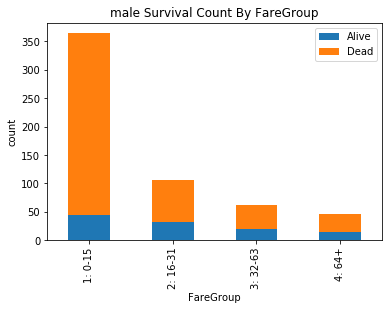

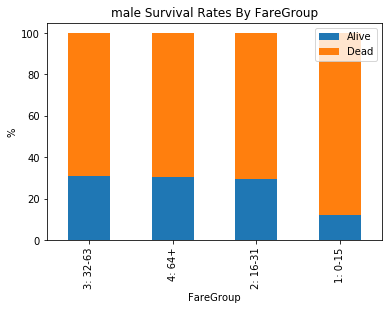

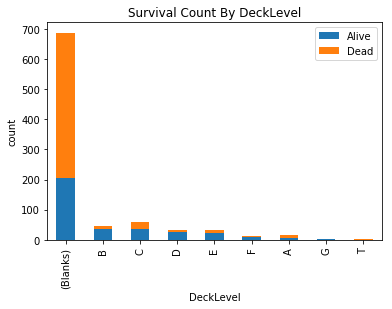

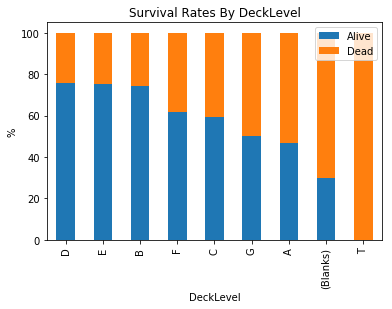

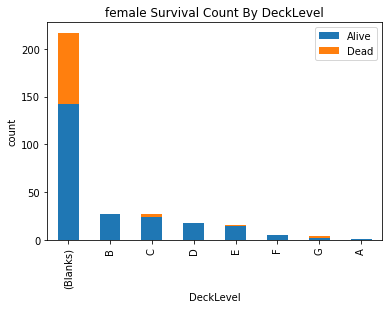

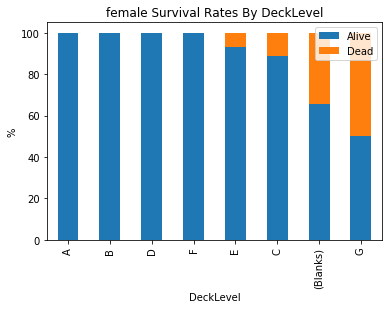

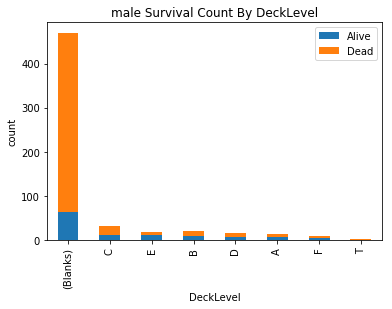

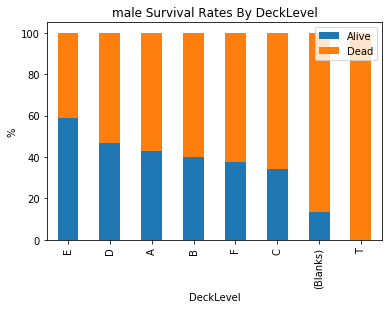

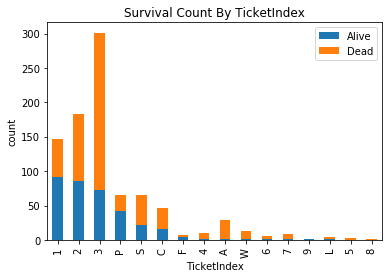

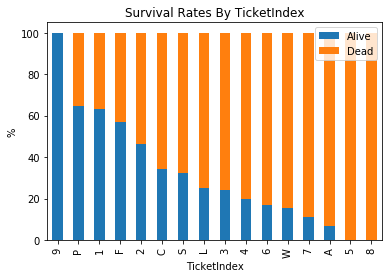

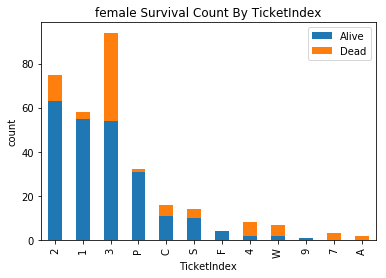

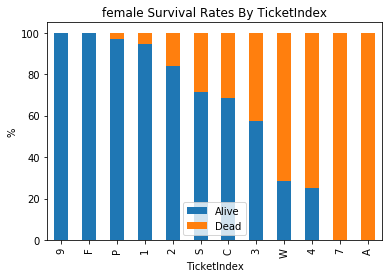

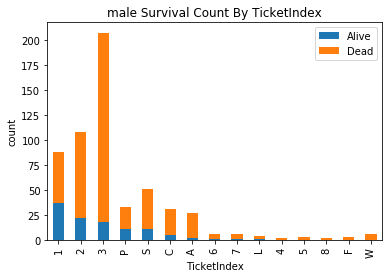

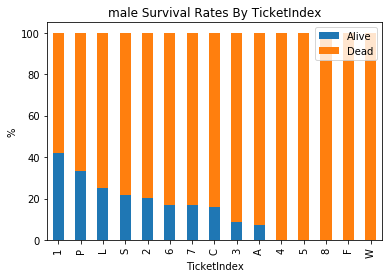

In [262]:
feature = []
for x in transform_df.columns:
    feature.append(x)
position = feature.index('PassengerId')
del feature[position]
position = feature.index('Survived')
del feature[position]
position = feature.index('Name')
del feature[position]
position = feature.index('Age')
del feature[position]
position = feature.index('Ticket')
del feature[position]
position = feature.index('Fare')
del feature[position]
position = feature.index('Cabin')
del feature[position]
for xlabel in feature:
    plot_survival_count(alive, dead, 'Survival Count By '+xlabel, xlabel, 'count')
    plot_survival_rates(alive, dead, 'Survival Rates By '+xlabel, xlabel, '%')
    plot_survival_count(female_alive, female_dead, 'female Survival Count By '+xlabel, xlabel, 'count')
    plot_survival_rates(female_alive, female_dead, 'female Survival Rates By '+xlabel, xlabel, '%')
    plot_survival_count(male_alive, male_dead, 'male Survival Count By '+xlabel, xlabel, 'count')
    plot_survival_rates(male_alive, male_dead, 'male Survival Rates By '+xlabel, xlabel, '%')
    

In [263]:
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    return (std_x * std_y).mean()

In [264]:
SibSp_group = transform_df.groupby('SibSp').size().reset_index(name='count')
SibSp_list = SibSp_group['SibSp']
Parch_group = transform_df.groupby('Parch').size().reset_index(name='count')
Parch_list = Parch_group['Parch']

female_alive_SibSp = female_alive.groupby(['SibSp','AgeGroup']).size().reset_index(name='Alive')
female_alive_Parch = female_alive.groupby(['Parch','AgeGroup']).size().reset_index(name='Alive')

for x in SibSp_list:
    table1 = female_alive_SibSp[female_alive_SibSp['SibSp']==x]
    for y in Parch_list:
        table2 = female_alive_Parch[female_alive_Parch['Parch']==y]
        alive_correlation = correlation(table1['Alive'], table2['Alive'])
        if not isnan(alive_correlation):
            print("")
            print("female_alive_SibSp["+str(x)+"]")
            print("female_alive_Parch["+str(y)+"]")
            print("alive_correlation = "+str(alive_correlation))



female_alive_SibSp[0]
female_alive_Parch[0]
alive_correlation = 0.9870738071792253

female_alive_SibSp[1]
female_alive_Parch[1]
alive_correlation = 0.2727485790461201

female_alive_SibSp[1]
female_alive_Parch[2]
alive_correlation = -0.5038374546677113

female_alive_SibSp[2]
female_alive_Parch[2]
alive_correlation = 0.18156825980064067

female_alive_SibSp[2]
female_alive_Parch[3]
alive_correlation = -1.3728129459672882


In [265]:
male_alive_SibSp = male_alive.groupby(['SibSp','AgeGroup']).size().reset_index(name='Alive')
male_alive_Parch = male_alive.groupby(['Parch','AgeGroup']).size().reset_index(name='Alive')

for x in SibSp_list:
    table1 = male_alive_SibSp[male_alive_SibSp['SibSp']==x]
    for y in Parch_list:
        table2 = male_alive_Parch[male_alive_Parch['Parch']==y]
        alive_correlation = correlation(table1['Alive'], table2['Alive'])
        if not isnan(alive_correlation):
            print("")
            print("male_alive_SibSp["+str(x)+"]")
            print("male_alive_Parch["+str(y)+"]")
            print("alive_correlation = "+str(alive_correlation))
            
male_dead_SibSp = male_dead.groupby(['SibSp','AgeGroup']).size().reset_index(name='Dead')
male_dead_Parch = male_dead.groupby(['Parch','AgeGroup']).size().reset_index(name='Dead')

for x in SibSp_list:
    table1 = male_dead_SibSp[male_dead_SibSp['SibSp']==x]
    for y in Parch_list:
        table2 = male_dead_Parch[male_dead_Parch['Parch']==y]
        dead_correlation = correlation(table1['Dead'], table2['Dead'])
        if not isnan(dead_correlation):
            print("")
            print("male_dead_SibSp["+str(x)+"]")
            print("male_dead_Parch["+str(y)+"]")
            print("dead_correlation = "+str(dead_correlation))            


male_alive_SibSp[0]
male_alive_Parch[0]
alive_correlation = 0.9829995280773864

male_alive_SibSp[1]
male_alive_Parch[1]
alive_correlation = 0.6979353532169338

male_alive_SibSp[1]
male_alive_Parch[2]
alive_correlation = -1.299867367239363

male_dead_SibSp[0]
male_dead_Parch[0]
dead_correlation = 0.9998780461867218

male_dead_SibSp[1]
male_dead_Parch[1]
dead_correlation = 0.2899135645556067

male_dead_SibSp[2]
male_dead_Parch[2]
dead_correlation = 0.2894736842105264


In [266]:
N = 500
x = np.linspace(0, 1, N)
y = np.random.randn(N)
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,0.000000,-0.677877
1,0.002004,0.797527
2,0.004008,-0.603509
3,0.006012,0.707850
4,0.008016,0.425669


In [267]:
#whatever = transform_df.loc['Gender']
#print(whatever)
#plt.hist(male_alive.values(), bins=8)
#plt.xlabel('Number of days')
#plt.title('Distribution of classroom visits in the first week ' + 
#          'for students who do not pass the subway project')
#plt.show()

In [268]:
#%pylab inline
#import matplotlib.pyplot as plt
#import seaborn as sns

In [ ]:
#scaled_entries = (data_by_location['ENTRIESn_hourly'] /
#                  data_by_location['ENTRIESn_hourly'].std())

In [ ]:
#plt.scatter(data_by_location['latitude'], data_by_location['longitude'],
#            s=scaled_entries)